# Create Code to Extract Ground Truth Labels
- Pull Board from images.


## Define the board:

- gt_board
- irl_board

In [1]:
%load_ext lab_black

## Idea: `BoardExtractor`

In [14]:
class BoardExtractor:
    def __init__(self):
        pass

    def set_image(self, img):
        self.img = img

    def extract_gt_board(self):
        pass

## Imports

In [5]:
import cv2
import matplotlib.pylab as plt


def cv2_imgshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

## Show an example image

In [6]:
example_img = "../data/jtOekrlROk4/jtOekrlROk4_10185.jpg"
img = cv2.imread(example_img)

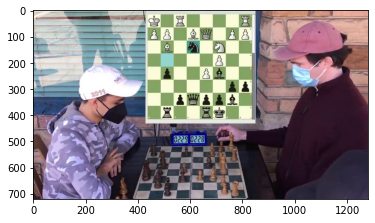

In [7]:
cv2_imgshow(img)

## Extract the gt_board from the image

In [12]:
def extract_gt_board(img, top, bottom, left, right):
    gt_board = img[top:bottom, left:right, :].copy()
    img[top:bottom, left:right, :] = 0  # first_img[0:440, 430:850, :]
    return img, gt_board

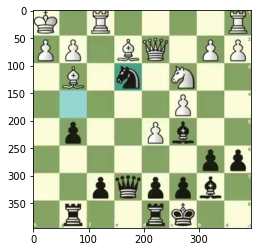

In [13]:
img = cv2.imread(example_img)
img, gt_board = extract_gt_board(img, top=20, bottom=415, left=440, right=835)
cv2_imgshow(gt_board)

## Split the gt_board into squares

In [15]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
    assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
    return (
        arr.reshape(h // nrows, nrows, -1, ncols)
        .swapaxes(1, 2)
        .reshape(-1, nrows, ncols)
    )

In [20]:
gt_board.shape

(395, 395, 3)

In [42]:
# 400 - 395

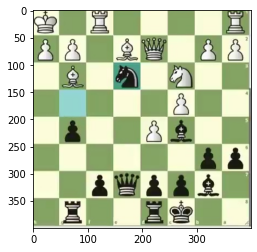

In [30]:
img = cv2.imread(example_img)
img, gt_board = extract_gt_board(img, top=20, bottom=420, left=440, right=840)
cv2_imgshow(gt_board)
split_board = blockshaped(
    gt_board[:, :, 0], gt_board.shape[0] // 8, gt_board.shape[1] // 8
)

In [41]:
# split_board.shape

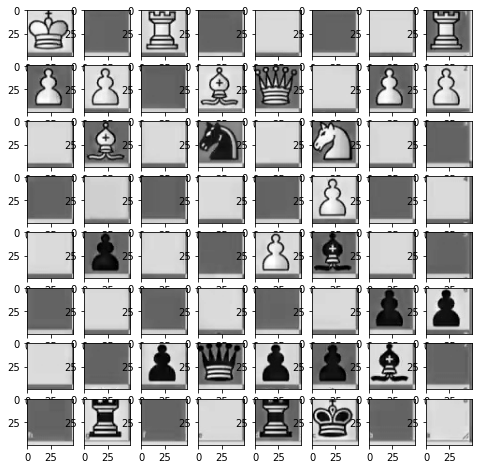

In [56]:
fig, axs = plt.subplots(8, 8, figsize=(8, 8))
axs = axs.flatten()
for i in range(split_board.shape[0]):
    axs[i].imshow(cv2.cvtColor(split_board[i, :, :], cv2.COLOR_BGR2RGB))
plt.show()

## How to we write this position in FEN notation?

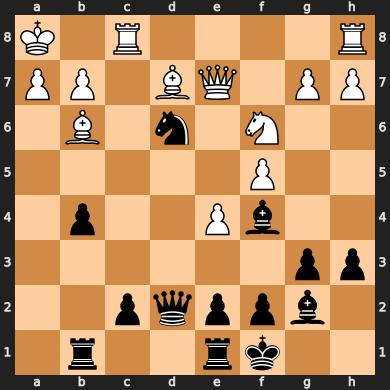

In [62]:
import chess

# fen_example = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"
fen_example = "K1R4R/PP1BQ1PP/1B1n1N2/5P2/1p2Pb2/6pp/2pqppb1/1r2rk2"
chess.Board(fen_example)